<a href="https://colab.research.google.com/github/JairAlberto3945/JairAlberto3945/blob/main/MetodoTransf_Inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Huerta Diaz Jair Alberto  

Método de Transformada Inversa para distribución triangular.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

In [13]:
# Parámetros de la distribución triangular
a = 1
b = 3
c = 5
n = 10000

# Transformada inversa
def triangular_inverse(u, a, b, c):
    F_b = (b - a) / (c - a)
    x = np.where(
        u < F_b,
        a + np.sqrt(u * (b - a) * (c - a)),
        c - np.sqrt((1 - u) * (c - b) * (c - a))
    )
    return x

In [16]:
u = np.random.uniform(0, 1, n)
samples = triangular_inverse(u, a, b, c)

# Estadísticas simuladas
media_simulada = np.mean(samples)
std_simulada = np.std(samples)

# Estadísticas teóricas
media_teorica = (a + b + c) / 3
var_teorica = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
std_teorica = np.sqrt(var_teorica)
print("Media simulada:", media_simulada)
print("Media teórica:", media_teorica)
print("Desviación estándar simulada:", std_simulada)
print("Desviación estándar teórica:", std_teorica)

x = np.linspace(a, c, 1000)
rv = triang(c=(b - a) / (c - a), loc=a, scale=c - a)
y_teorica = rv.pdf(x)

Media simulada: 3.008923634944351
Media teórica: 3.0
Desviación estándar simulada: 0.8218304087334604
Desviación estándar teórica: 0.816496580927726


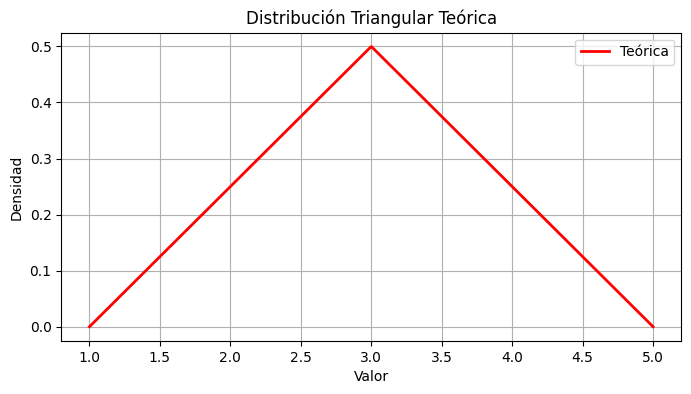

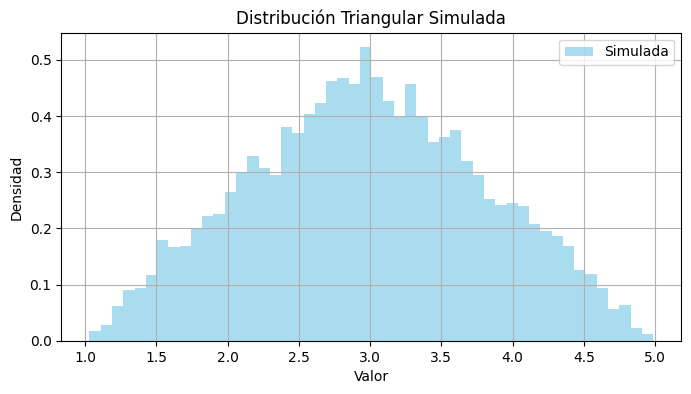

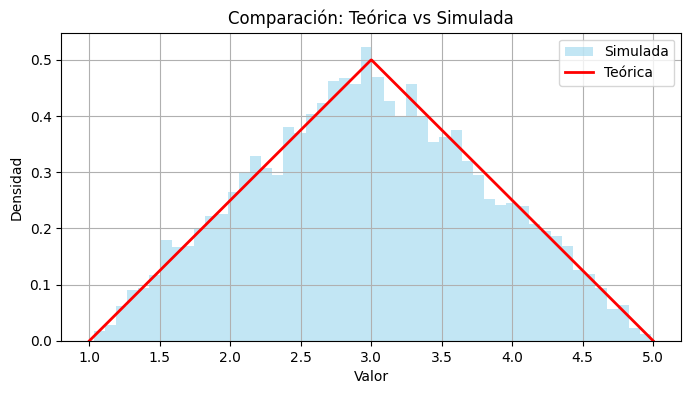

In [15]:
# Gráfica 1: Distribución teórica
plt.figure(figsize=(8, 4))
plt.plot(x, y_teorica, 'r-', lw=2, label='Teórica')
plt.title("Distribución Triangular Teórica")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 2: Distribución generada
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', label='Simulada')
plt.title("Distribución Triangular Simulada")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 3: Ambas distribuciones
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='skyblue', label='Simulada')
plt.plot(x, y_teorica, 'r-', lw=2, label='Teórica')
plt.title("Comparación: Teórica vs Simulada")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()
